### The main focus of this notebook is me practicing unique visualizations using Python along with several popular libraries. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
import altair as alt

%config InlineBackend.figure_format = 'retina' 

import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv("world-happiness-report.csv")
df2 = pd.read_csv("world-happiness-report-2021.csv")

In [3]:
df1 = df1.rename(columns={'Country name': 'Country'})
df2 = df2.rename(columns={'Country name': 'Country'})

In [4]:
df2 = df2[['Country','Regional indicator']]

In [5]:
df = pd.merge(df1, df2, on = 'Country', how = 'outer')

In [6]:
df.head()

,Country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional indicator
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,South Asia
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,South Asia
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,South Asia
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,South Asia
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,South Asia


In [7]:
df.isna().any()

Country                             False
year                                False
Life Ladder                         False
Log GDP per capita                   True
Social support                       True
Healthy life expectancy at birth     True
Freedom to make life choices         True
Generosity                           True
Perceptions of corruption            True
Positive affect                      True
Negative affect                      True
Regional indicator                   True
dtype: bool

In [8]:
df.dtypes

Country                              object
year                                  int64
Life Ladder                         float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
Regional indicator                   object
dtype: object

In [9]:
df.columns

Index(['Country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Regional indicator'],
      dtype='object')

## Top 10 Happiest Countries & Unhappiness 

In [10]:
top_happy = df.groupby(["Country"])['Life Ladder'].mean().sort_values(ascending = False)[:10]
low_happy = df.groupby(["Country"])['Life Ladder'].mean().sort_values(ascending = True)[:10]

In [11]:
top_low_merged = top_happy.append(low_happy, ignore_index = False).sort_values(ascending = True)

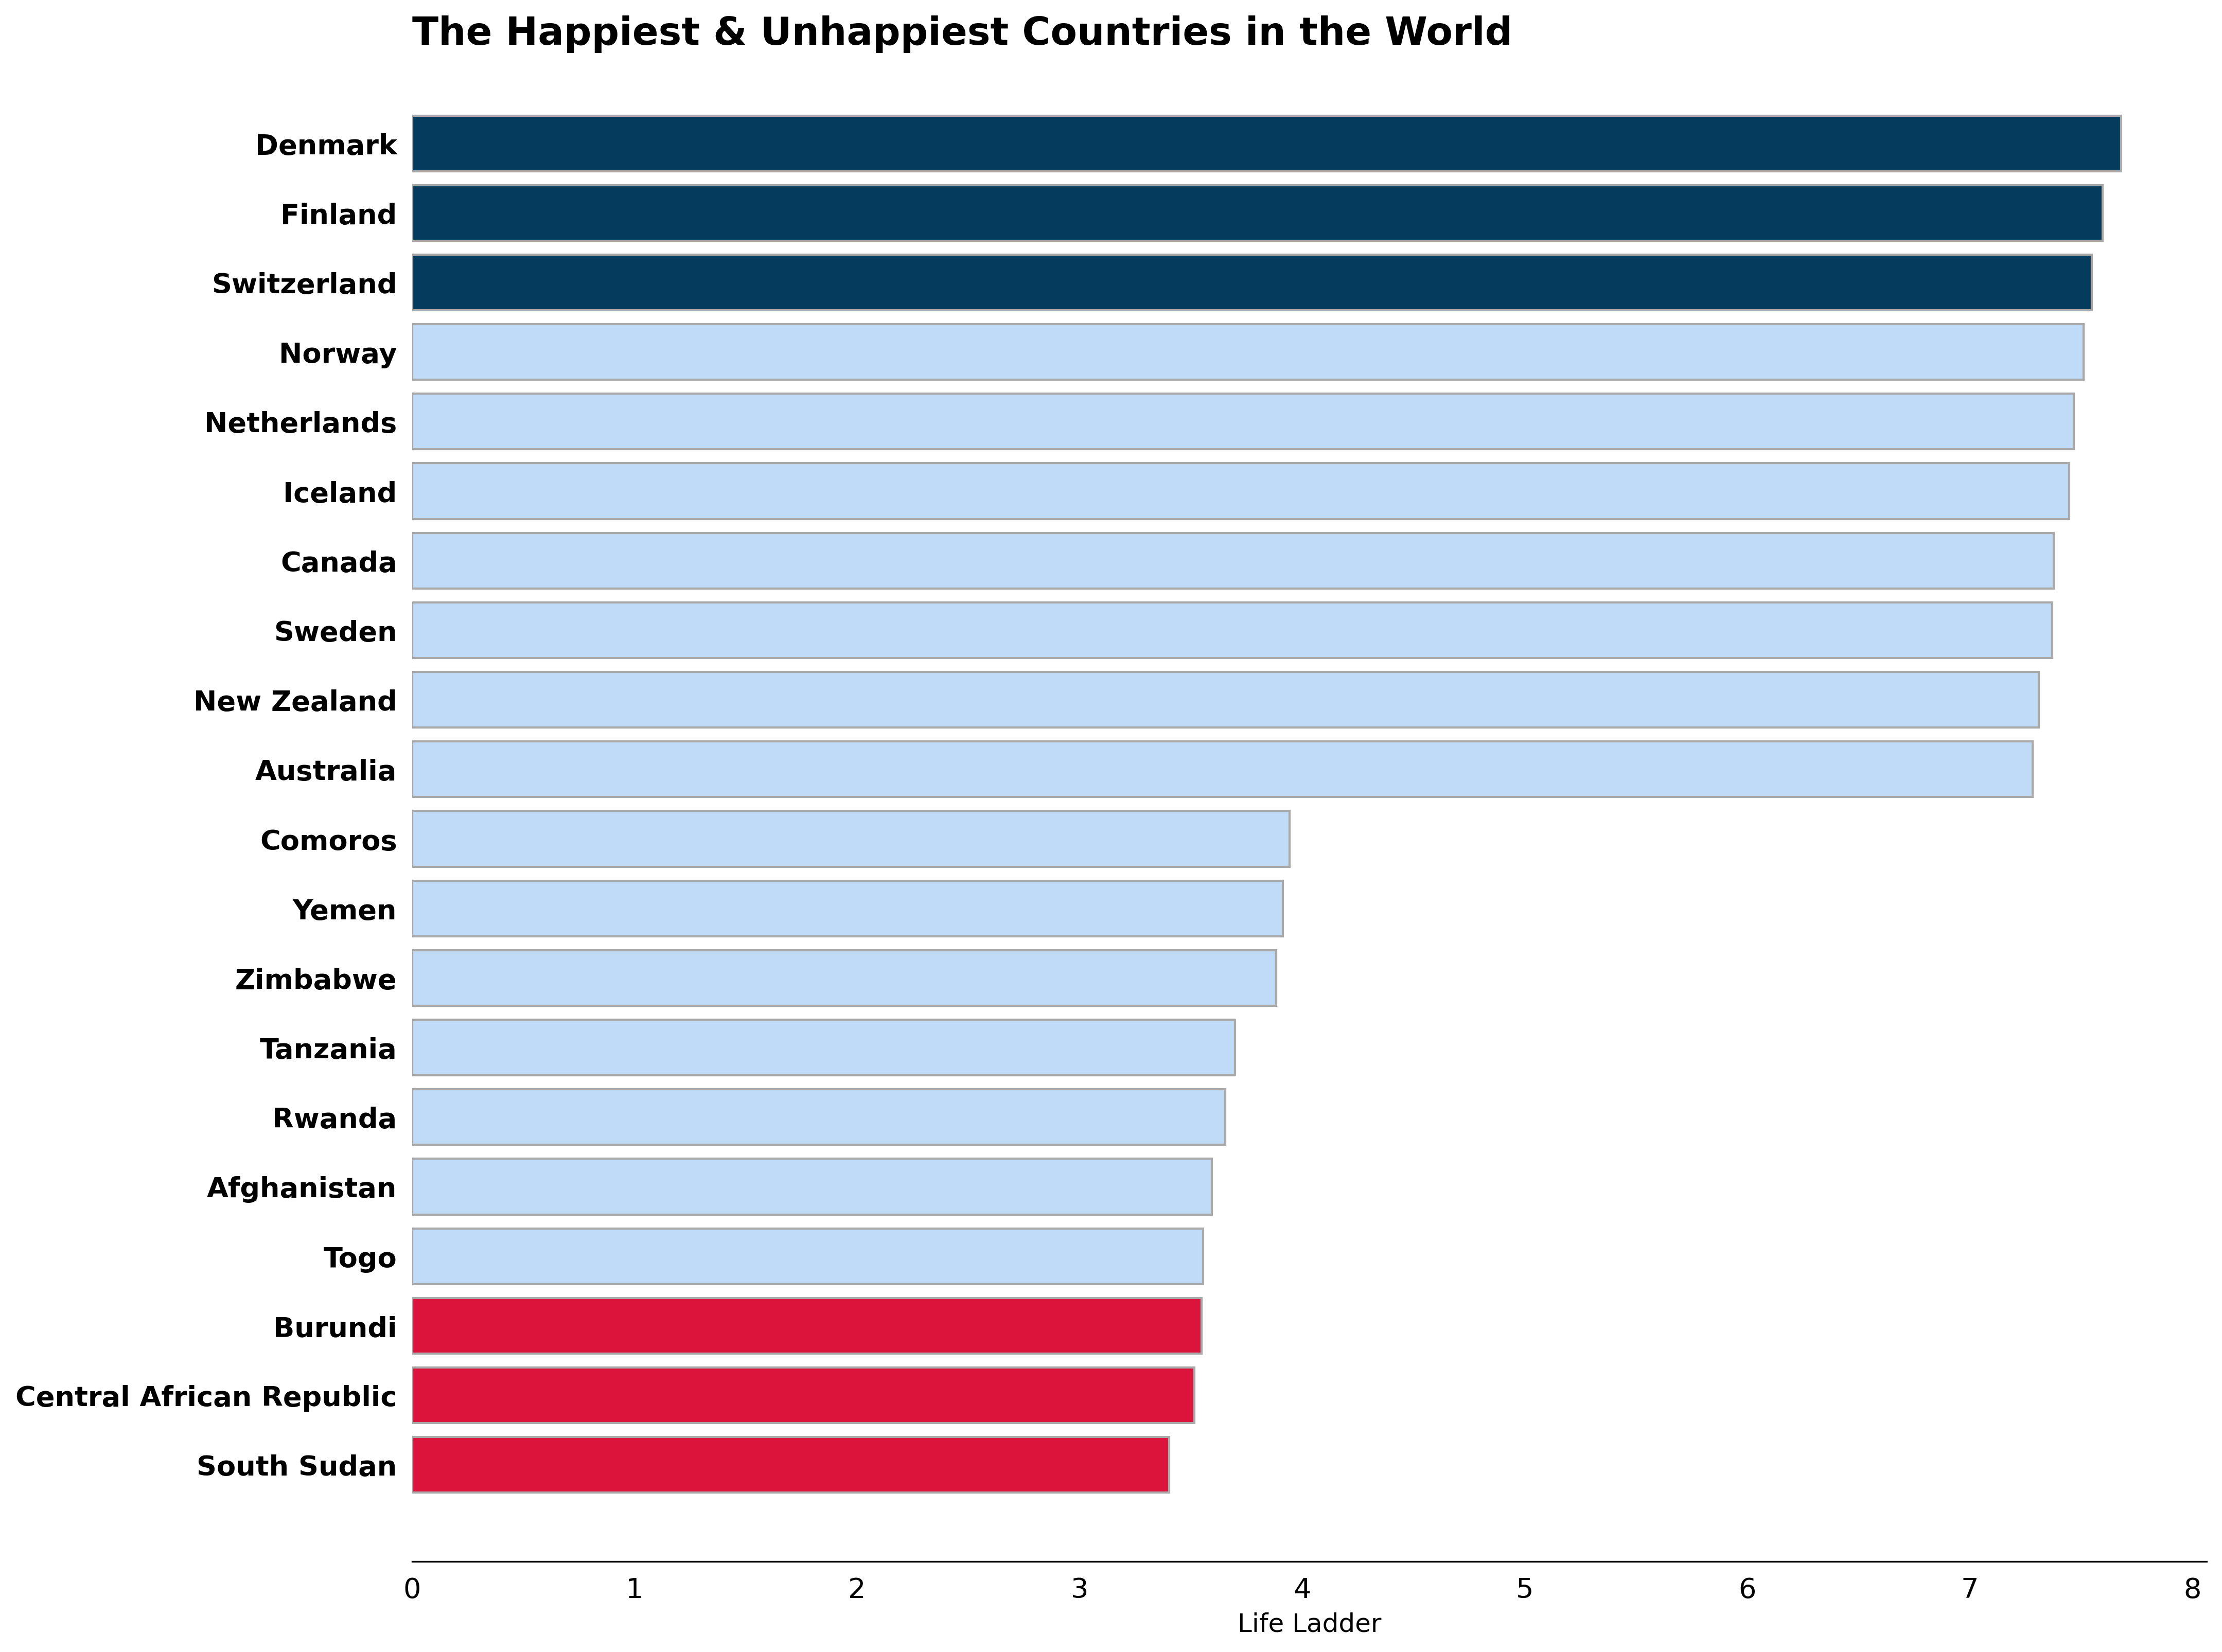

<Figure size 432x288 with 0 Axes>

In [12]:
fig, ax = plt.subplots(figsize = (15, 13), dpi=150)

gs = fig.add_gridspec(1,1)
gs.update(wspace=0.05, hspace=0.27)

colormap = ["#BFDBF7" for _ in range(20)]

colormap[0] = colormap[1] = colormap[2] = "crimson" 

colormap[17] = colormap[18] = colormap[19] = "#053C5E" 



ax.barh(top_low_merged.index, top_low_merged , edgecolor ='darkgray', color = colormap)

ax.axes.get_xaxis().set_ticks([0,1,2,3,4,5,6,7,8])
#ax.axes.get_yaxis().set_ticks([])

for direction in ['top', 'right', 'left']:
    ax.spines[direction].set_visible(False)

plt.title('The Happiest & Unhappiest Countries in the World', 
        fontsize=18, fontweight='bold', loc = 'left', pad = 1)
    
plt.yticks(fontsize=13, weight = "bold", fontfamily='sans-serif')

plt.xlabel("Life Ladder", fontsize=12 ,fontfamily='sans-serif')
plt.xticks(fontsize=13) 

ax.tick_params(axis='both', which='both',left=False, bottom=False,labelbottom=True)

plt.show()

plt.tight_layout()

## Continent View

In [13]:
region_freedom_fil = df.groupby(['Country', 'Regional indicator', 'year'])['Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'].mean().reset_index()

In [14]:
euro = region_freedom_fil[region_freedom_fil['Regional indicator'] == 'Central and Eastern Europe']

In [15]:
euro_cross = pd.pivot_table(euro, values = 'Life Ladder', index = ['Country'], columns = ['year'])

findfont: Font family ['sansserif'] not found. Falling back to DejaVu Sans.


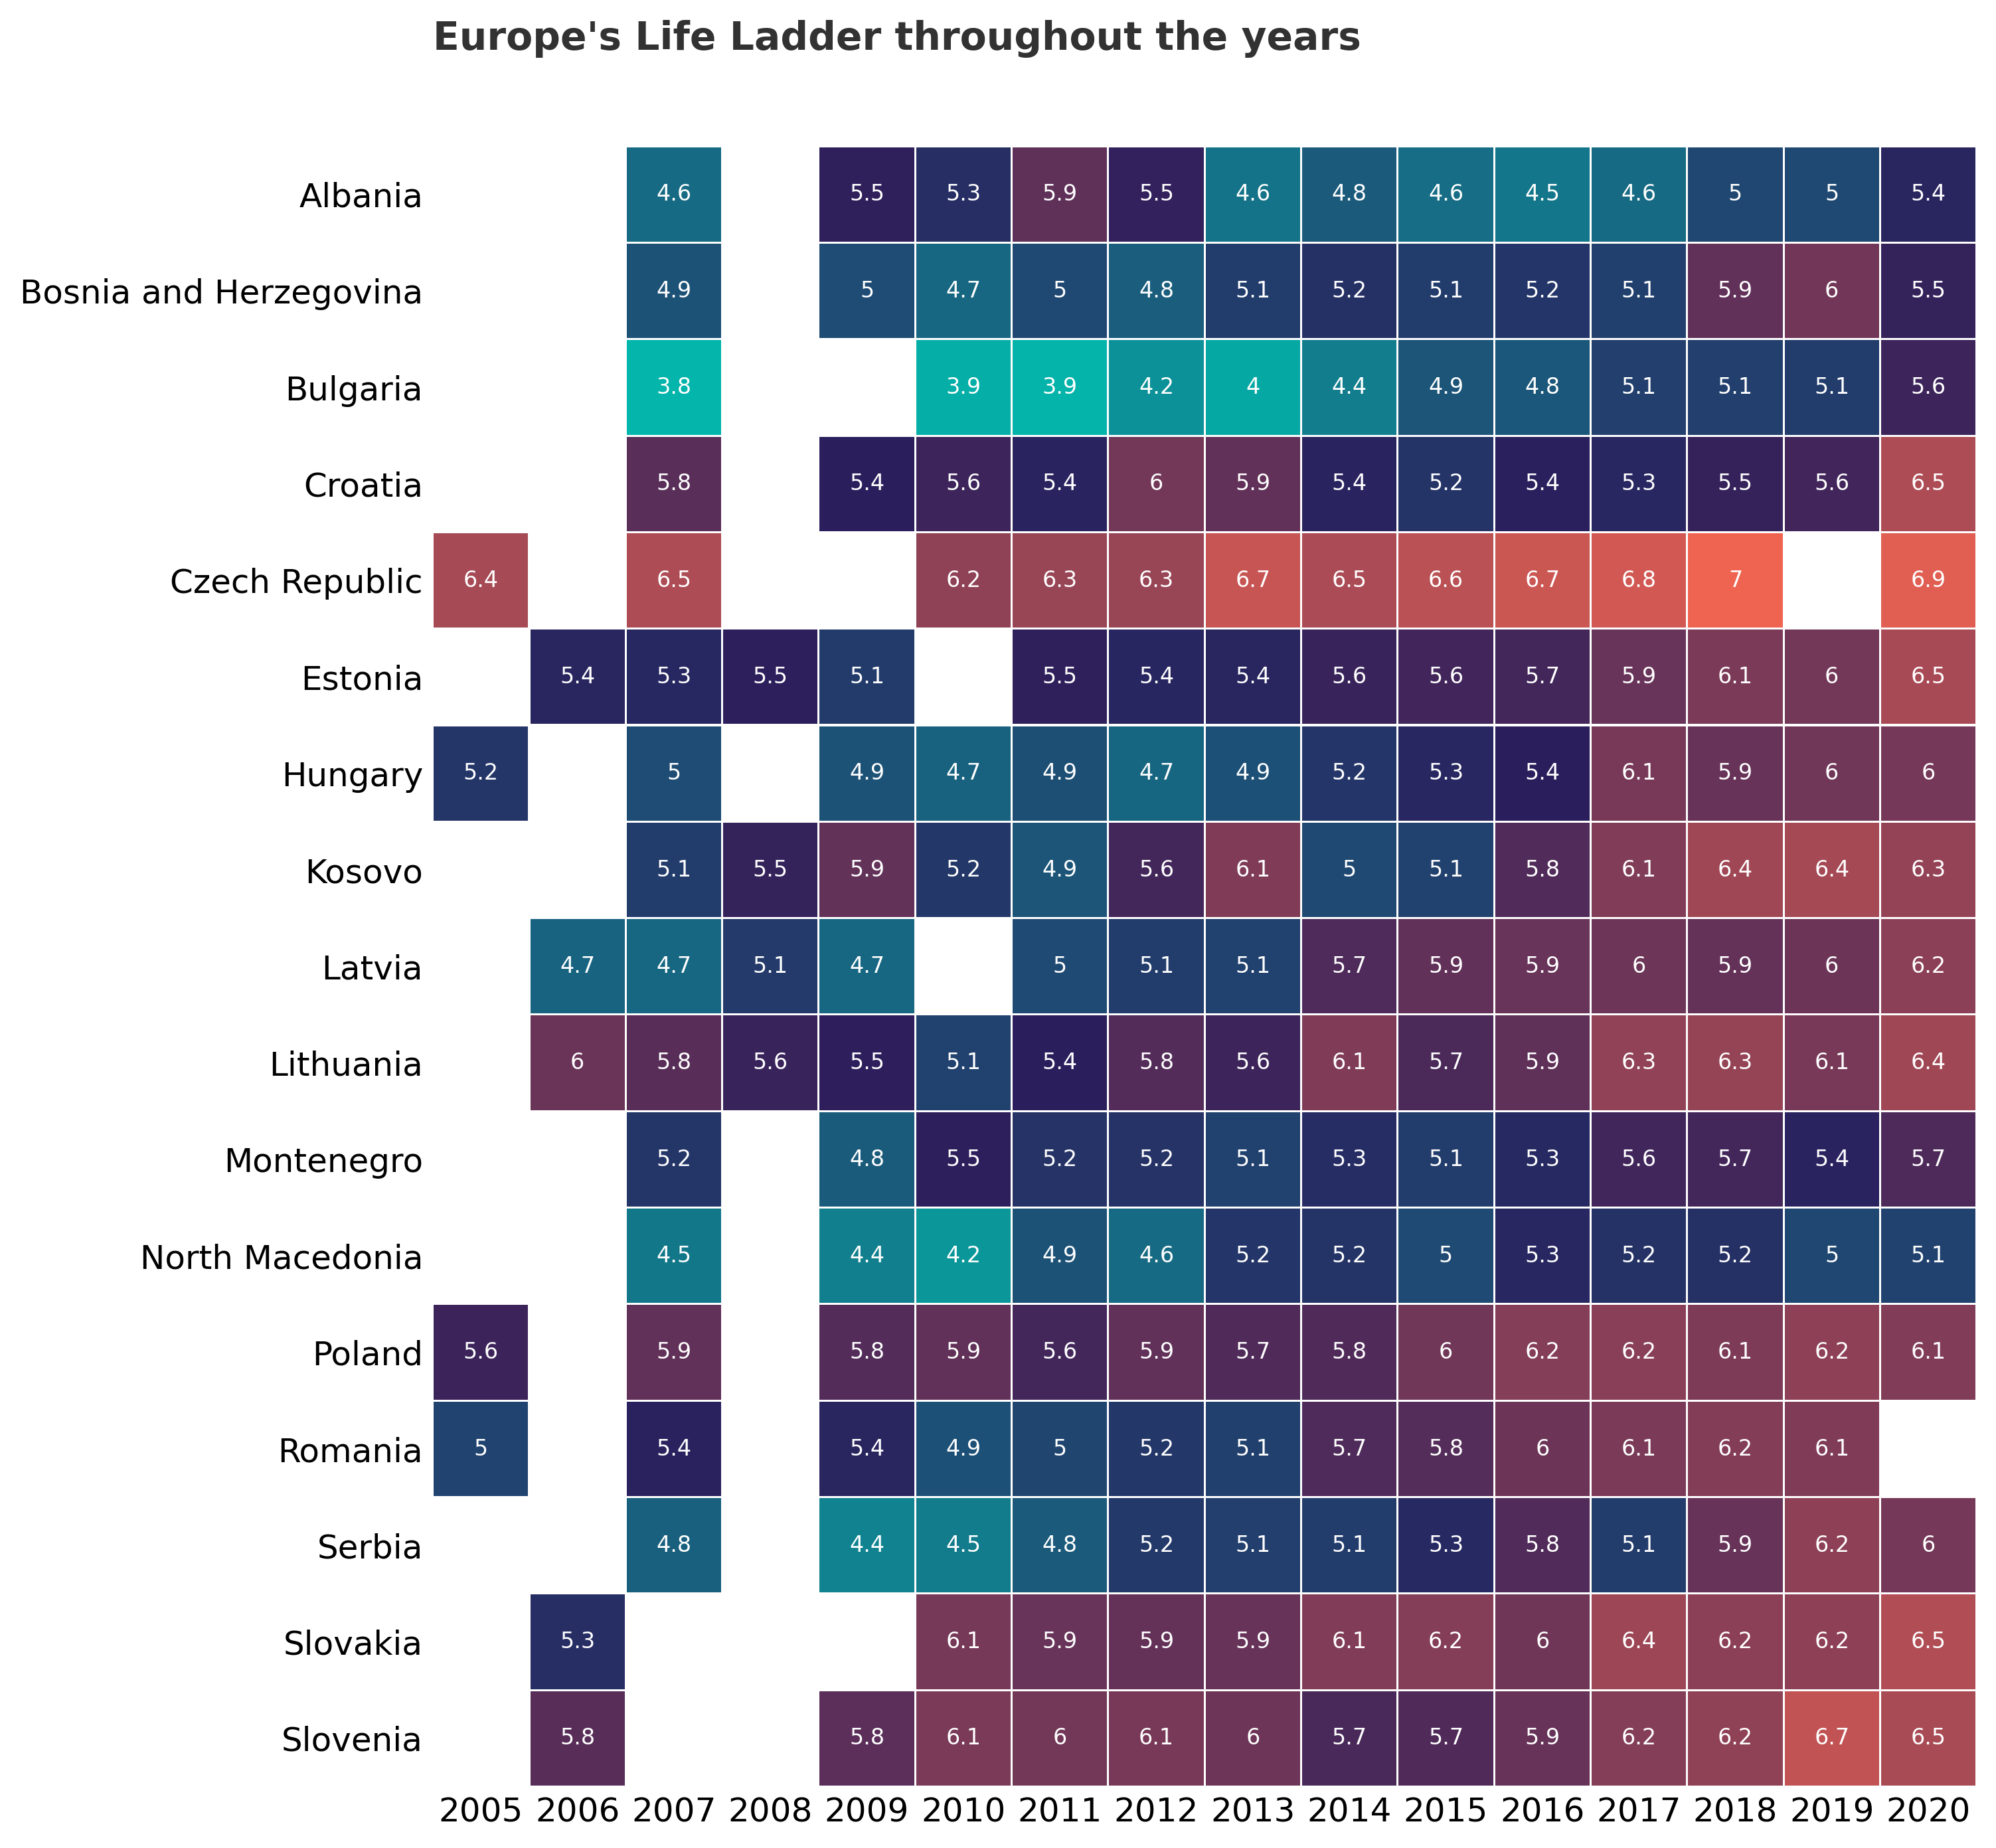

In [16]:
background_color = "#FFFFFF"
fig, ax = plt.subplots(1, 1, figsize=(10, 15), dpi=150)


ax.set_facecolor(background_color) 

colors = ["#03B5AA", "#2A1E5C","#EF6351"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors) 



sns.heatmap(data = euro_cross, square = True, cbar = False, cmap = colormap,
           annot_kws={"size": 8},
           linewidth=.5,
           annot = True,
           ax = ax)



ax.spines['top'].set_visible(False)
ax.set_xlabel("")
ax.set_ylabel("")
plt.yticks(rotation=0,fontfamily='sans-serif',size=12)
plt.xticks(rotation=0,fontfamily='sans-serif', size=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

ax.text(0,-1,"Europe's Life Ladder throughout the years",
        fontfamily='sansserif',fontweight='normal',fontsize=14,weight='bold',color='#323232')


plt.show()

In [17]:
latin = region_freedom_fil[region_freedom_fil['Regional indicator'] == 'Latin America and Caribbean']

In [18]:
latin_pivot = pd.pivot_table(latin, values = 'Life Ladder', index = ['Country'], columns = ['year'])

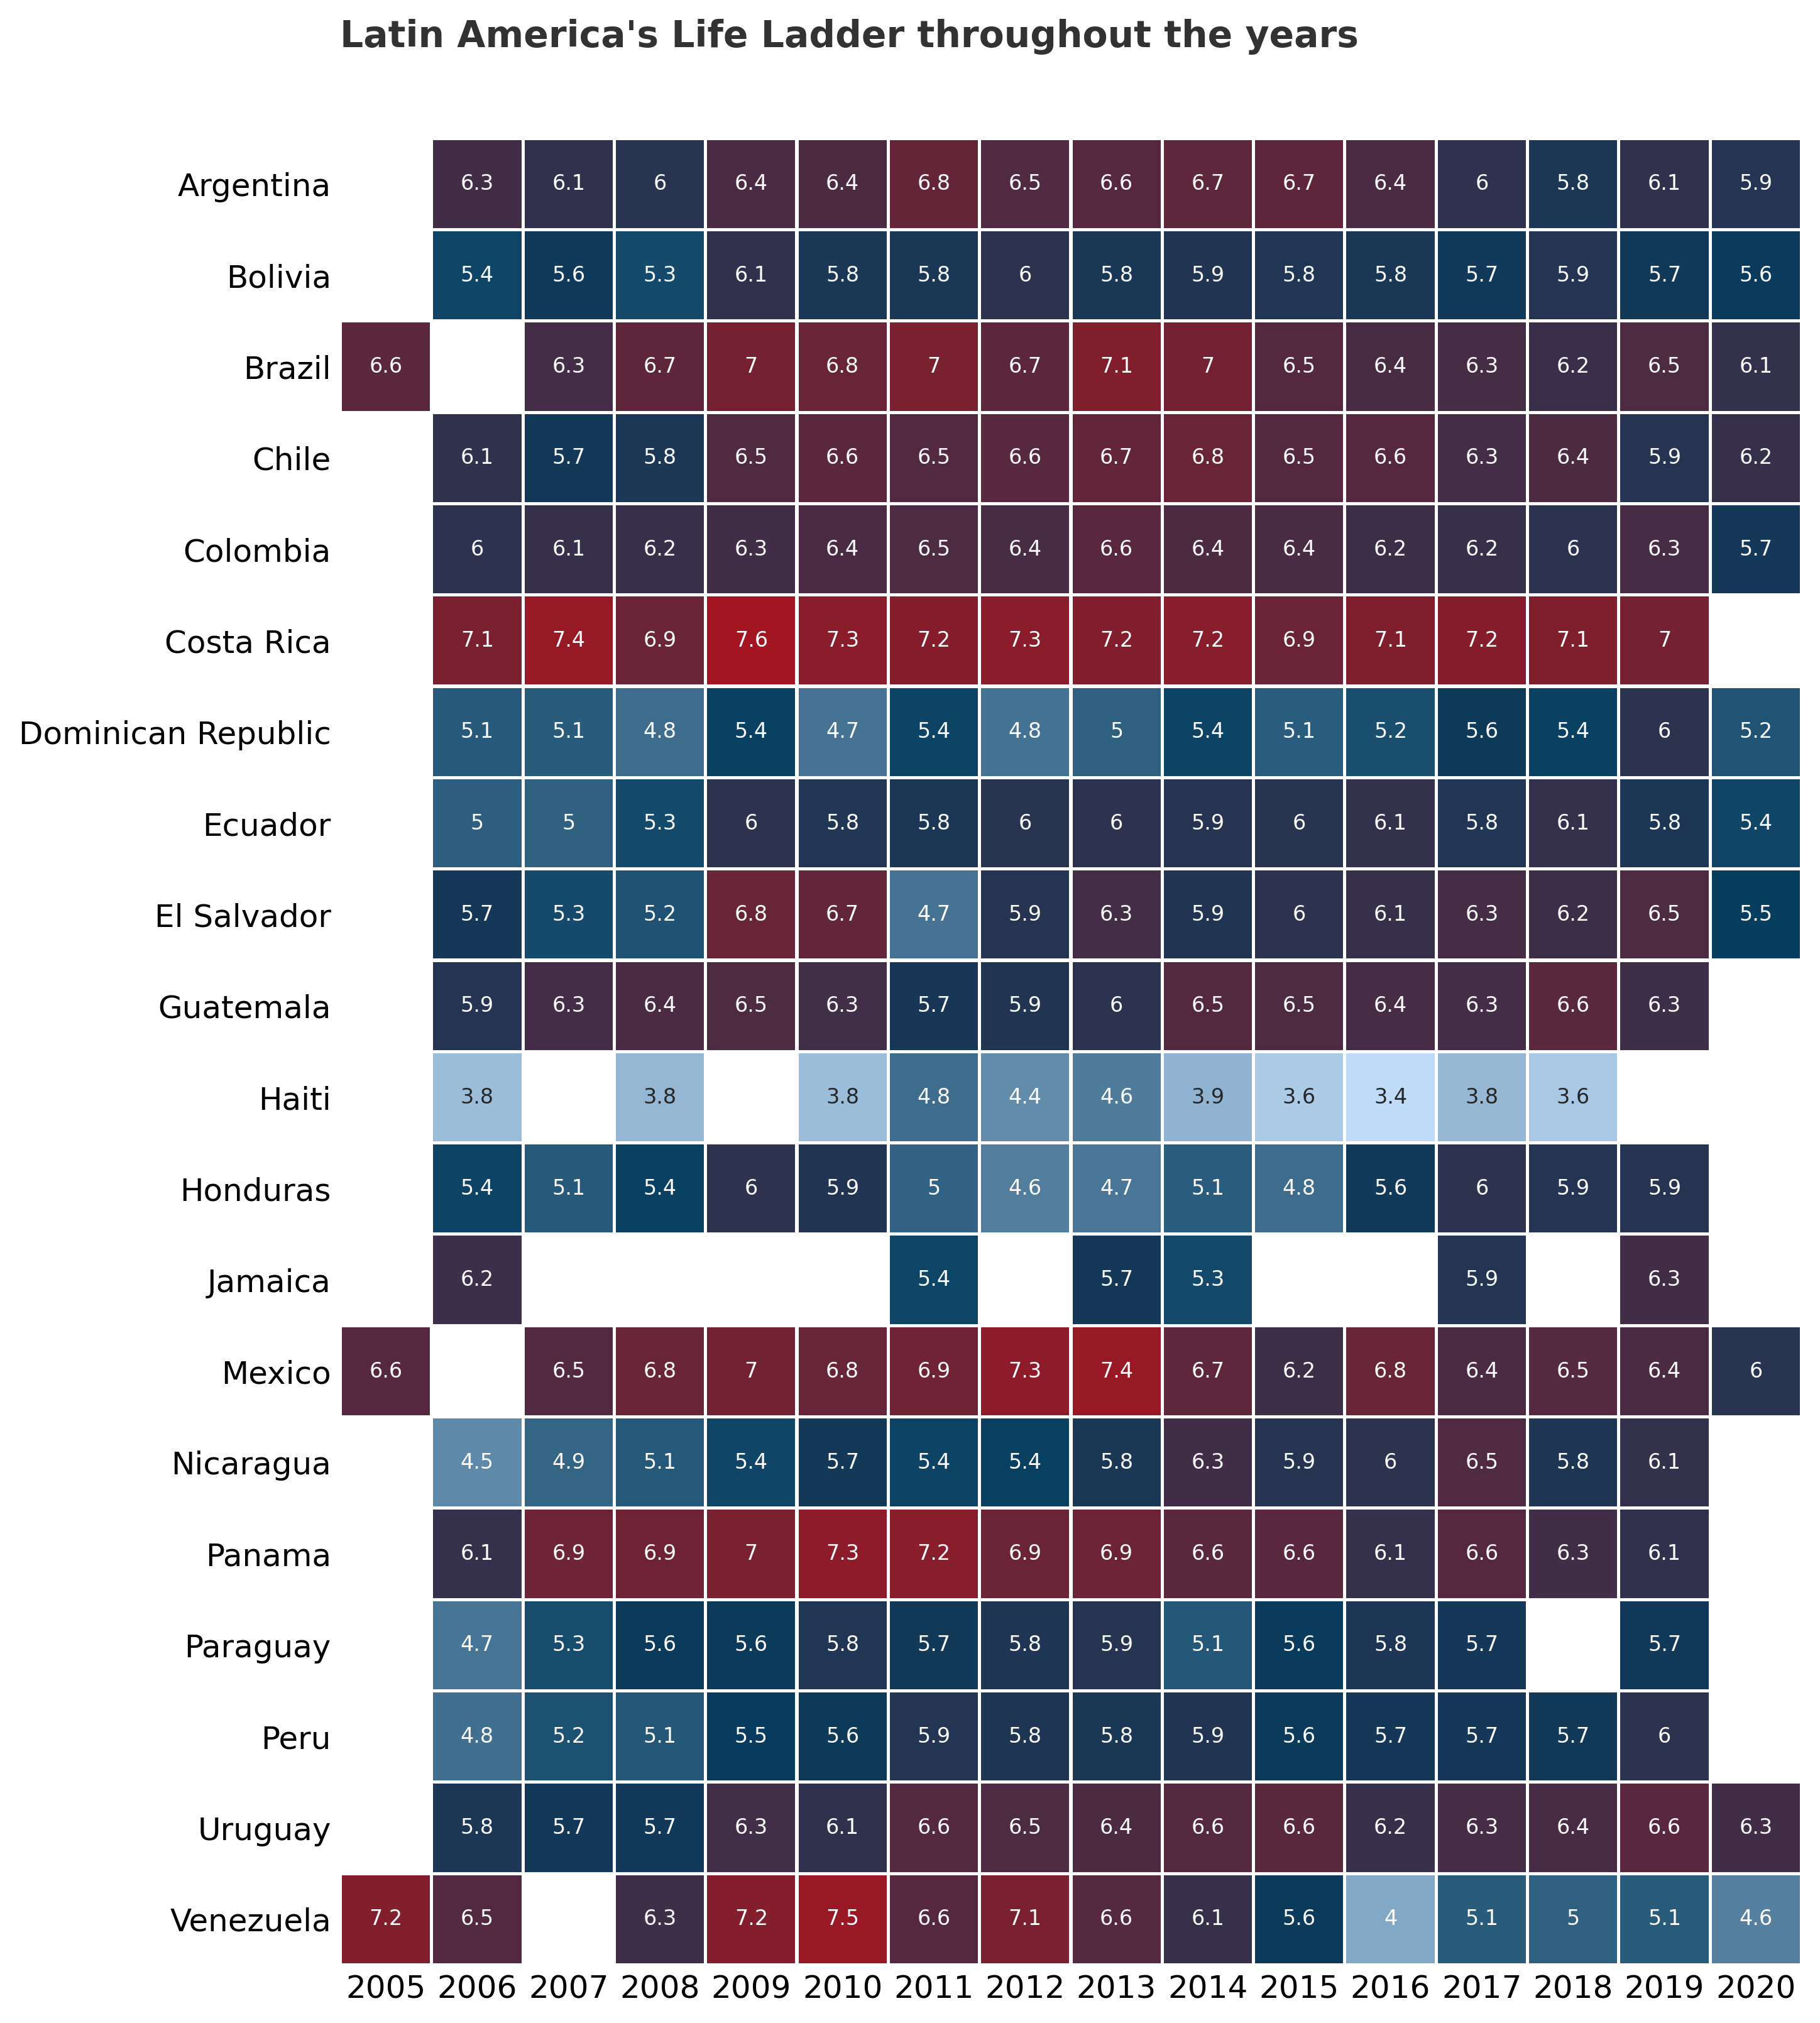

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 15), dpi=150)

colors = ["#BFDBF7", "#053C5E","#A31621"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors) 



sns.heatmap(data = latin_pivot, square = True, cbar = False, cmap = colormap,
           annot_kws={"size": 8},
           linewidth=1,
           annot = True,
           ax = ax)



ax.spines['top'].set_visible(False)
ax.set_xlabel("")
ax.set_ylabel("")
plt.yticks(rotation=0,fontfamily='sans-serif',size=12)
plt.xticks(rotation=0,fontfamily='sans-serif', size=12)
ax.tick_params(axis=u'both', which=u'both',length=0)


ax.text(0,-1,"Latin America's Life Ladder throughout the years",
        fontfamily='sans-serif',fontweight='normal',fontsize=14,weight='bold',color='#323232')


plt.show()

In [20]:
Asia_fil = df[(df['Regional indicator'] == 'East Asia') | (df['Regional indicator'] == 'South Asia') | (df['Regional indicator'] == 'Southeast Asia')]

In [21]:
AsiaG = Asia_fil.groupby(['Country'])['Life Ladder', 'Log GDP per capita'].mean().sort_values(by = 'Life Ladder',ascending = False).reset_index().head(7)

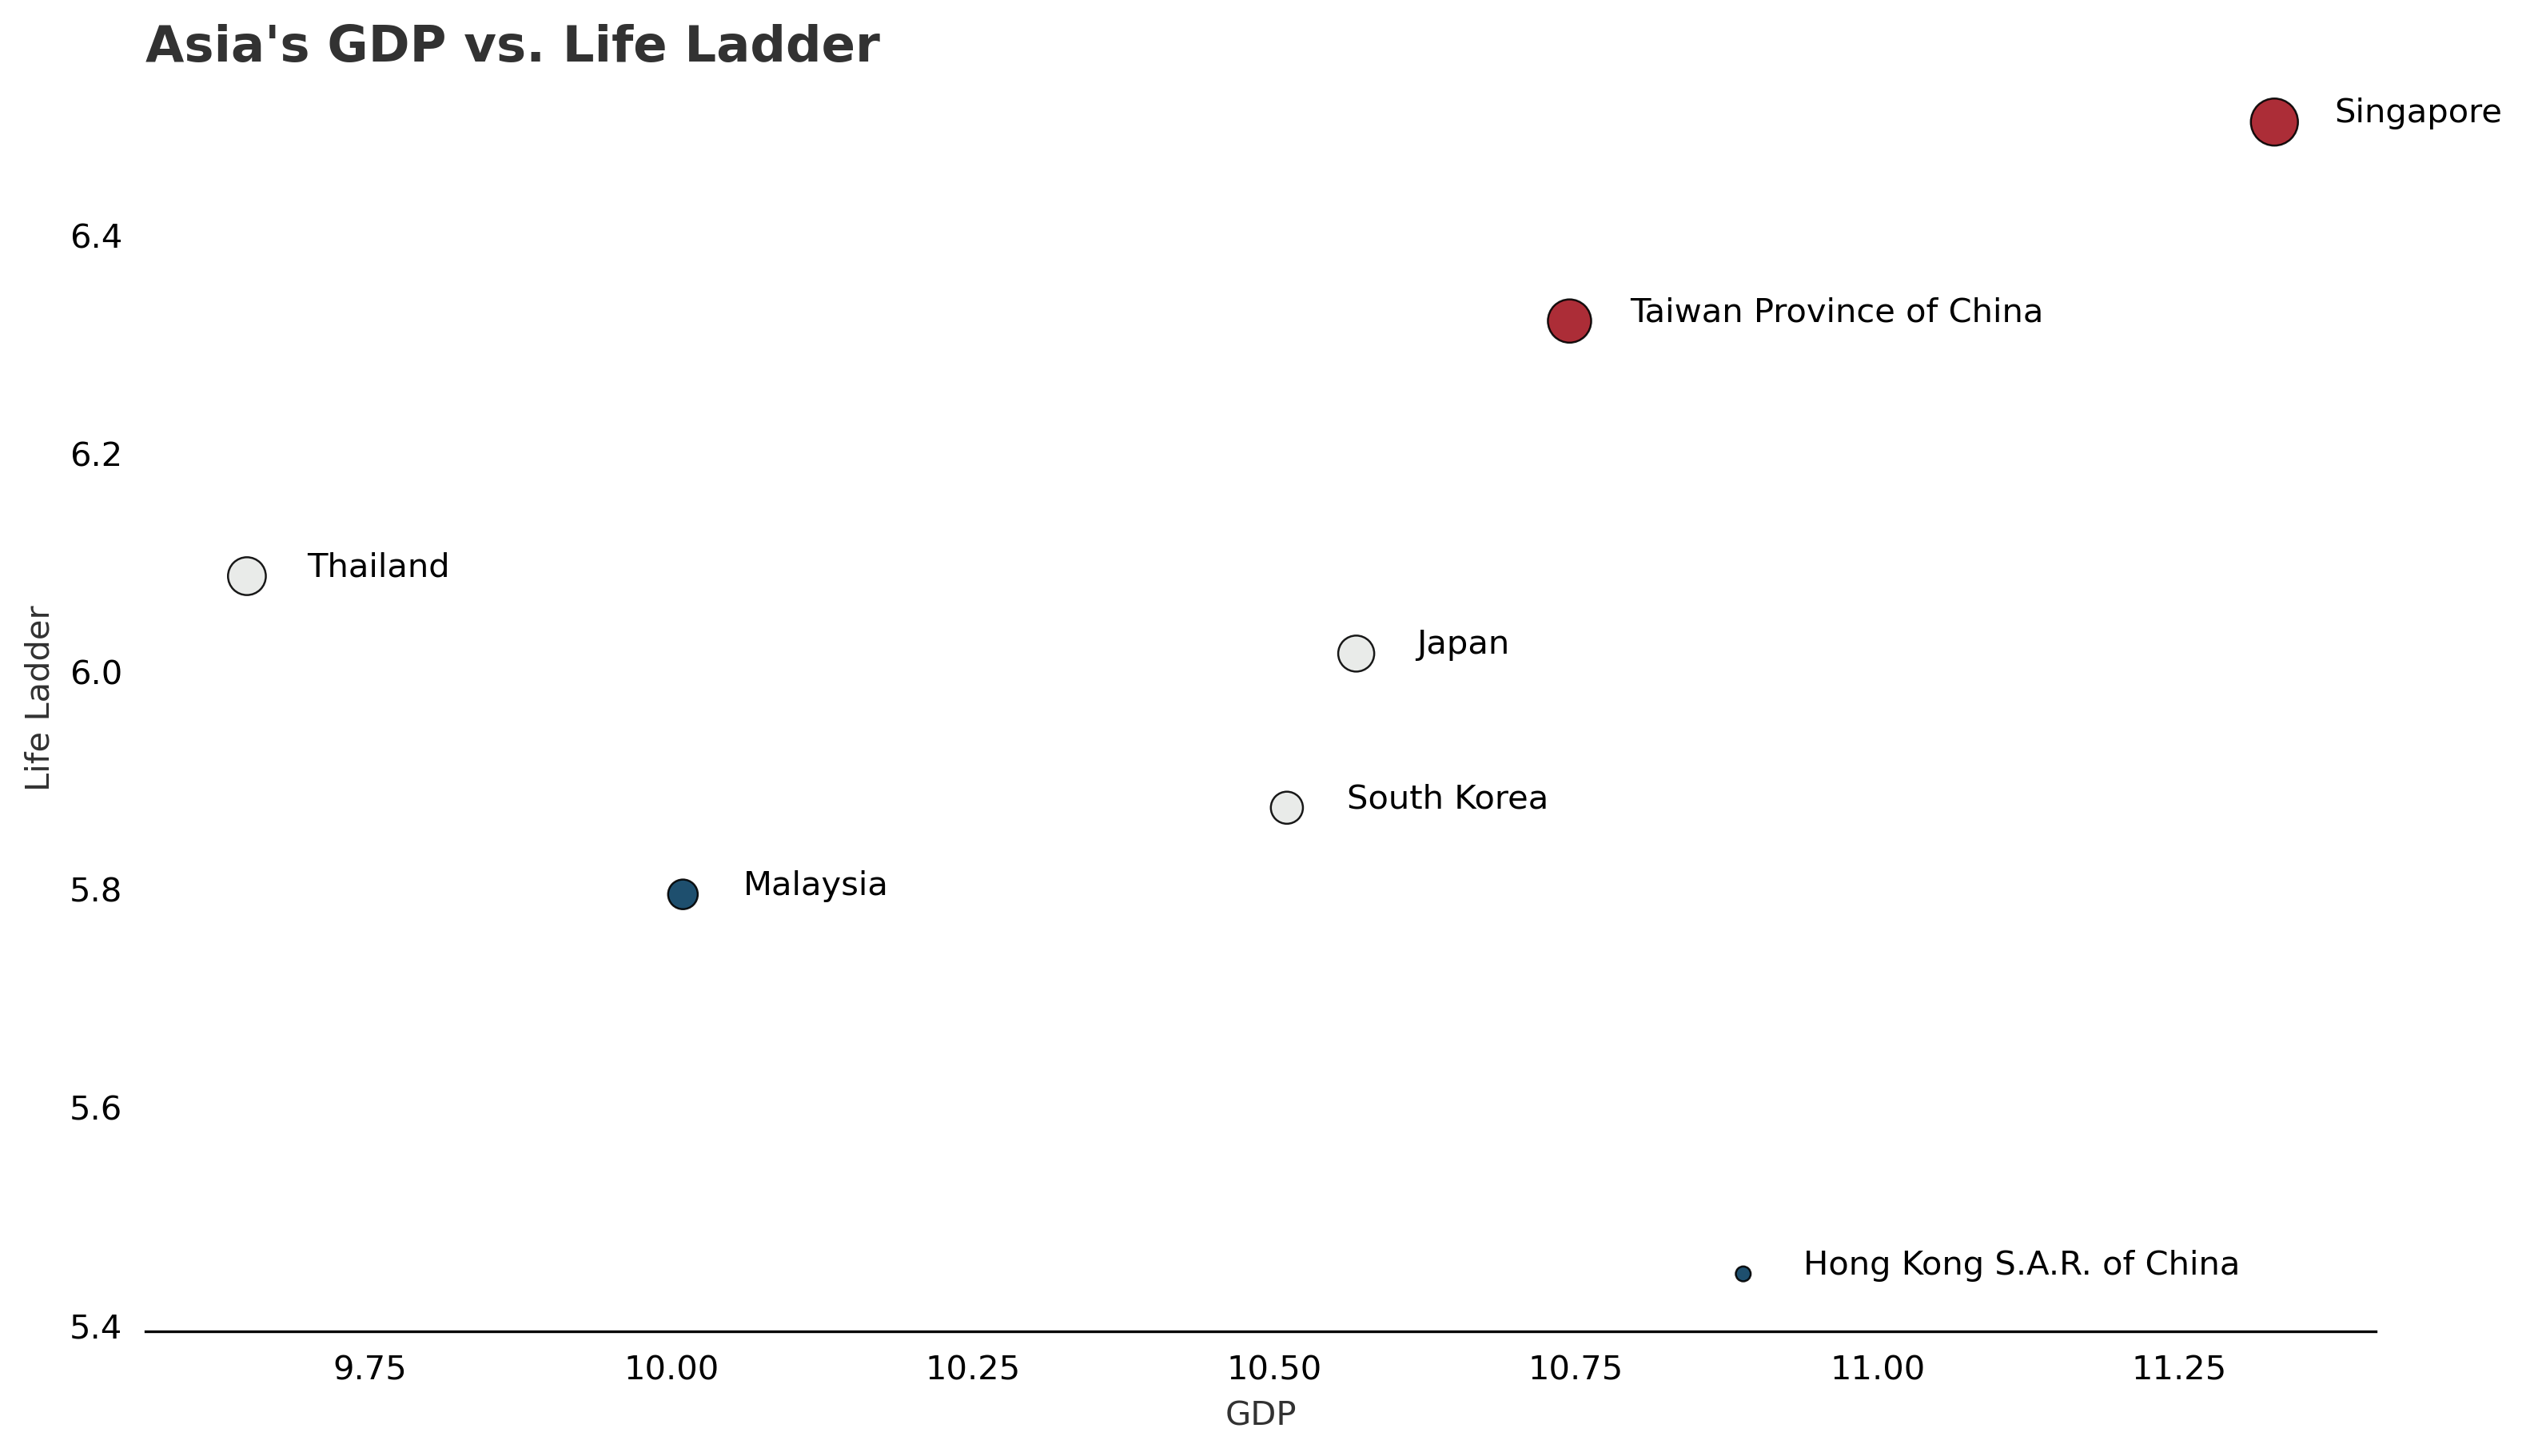

In [22]:
fig, ax = plt.subplots(1,1, figsize=(12, 7),dpi=150)

color_map = ['#e7e9e7' for _ in range(7)]
color_map[0] =  "#A31621" # color highlight
color_map[1] =  "#A31621"
color_map[5] =  "#053C5E"
color_map[6] =  "#053C5E"

sns.scatterplot(data = AsiaG, x = AsiaG['Log GDP per capita'],
               y=AsiaG['Life Ladder'],
               hue = AsiaG['Country'],
               alpha = 0.9,
               palette = color_map,
               size = AsiaG['Life Ladder'],
               legend = False,
                ec='black',
               sizes = (20,200)) 

ax.set_xlabel("")
ax.set_ylabel("") 

ax.set_xlabel("GDP",fontfamily='sans-serif',color='#323232')
ax.set_ylabel("Life Ladder",fontfamily='sans-serif',color='#323232')

ax.tick_params(axis = 'both', which = 'major', labelsize = 10) 



#ax.text(-0.5,60,'GDP & Life Ladder',fontweight='normal',fontsize=15,weight='bold',color='#323232')
#ax.text(55,7.3,'There are clear distinctions, with four stand-out continents',fontfamily='monospace',fontweight='light',fontsize=12,color='gray')

plt.title("Asia's GDP vs. Life Ladder",fontweight='normal',fontsize=15,weight='bold',color='#323232', loc = 'left', pad = 1)
ax.tick_params(axis='both', which='both',left=False, bottom=False,labelbottom=True)

for s in ["top","right","left"]:
    ax.spines[s].set_visible(False) 
    
for i, txt in enumerate(AsiaG['Country']):
    ax.annotate(txt, (AsiaG['Log GDP per capita'][i]+0.05,
               AsiaG['Life Ladder'][i]))
    
plt.show()